# Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

## 1. Camera Calibration with OpenCV

Extract object points and image points for camera calibration on at least 20 images to compute **camera calibration matrix** and calculate **distortion coefficients**

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib qt

### 1.1 Initialize object and image points

#### 1.1.1 Arrays to store object points and image points from all the images.

In [2]:
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

#### 1.1.2 Initialize object points with numpy zero function and mgrid for x and y values

In [3]:
# Chessboard with x(columns) = 9 & y(rows) = 6 inside corners

objp = np.zeros((9*6,3), np.float32) 
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)
print(objp)

[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 2.  0.  0.]
 [ 3.  0.  0.]
 [ 4.  0.  0.]
 [ 5.  0.  0.]
 [ 6.  0.  0.]
 [ 7.  0.  0.]
 [ 8.  0.  0.]
 [ 0.  1.  0.]
 [ 1.  1.  0.]
 [ 2.  1.  0.]
 [ 3.  1.  0.]
 [ 4.  1.  0.]
 [ 5.  1.  0.]
 [ 6.  1.  0.]
 [ 7.  1.  0.]
 [ 8.  1.  0.]
 [ 0.  2.  0.]
 [ 1.  2.  0.]
 [ 2.  2.  0.]
 [ 3.  2.  0.]
 [ 4.  2.  0.]
 [ 5.  2.  0.]
 [ 6.  2.  0.]
 [ 7.  2.  0.]
 [ 8.  2.  0.]
 [ 0.  3.  0.]
 [ 1.  3.  0.]
 [ 2.  3.  0.]
 [ 3.  3.  0.]
 [ 4.  3.  0.]
 [ 5.  3.  0.]
 [ 6.  3.  0.]
 [ 7.  3.  0.]
 [ 8.  3.  0.]
 [ 0.  4.  0.]
 [ 1.  4.  0.]
 [ 2.  4.  0.]
 [ 3.  4.  0.]
 [ 4.  4.  0.]
 [ 5.  4.  0.]
 [ 6.  4.  0.]
 [ 7.  4.  0.]
 [ 8.  4.  0.]
 [ 0.  5.  0.]
 [ 1.  5.  0.]
 [ 2.  5.  0.]
 [ 3.  5.  0.]
 [ 4.  5.  0.]
 [ 5.  5.  0.]
 [ 6.  5.  0.]
 [ 7.  5.  0.]
 [ 8.  5.  0.]]


#### 1.1.3 Run corner detection function on images

In [4]:
images = glob.glob('camera_cal/calibration*.jpg')

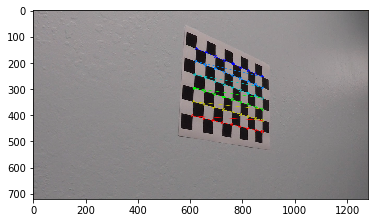

In [5]:
for idx, image in enumerate(images):

    ## 1 Preprocess image for cv2.findChessboardCorners function 
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ## 2 Find the chessboard corners
    nx = 9 # the number of inside corners in x
    ny = 6 # the number of inside corners in y
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    ## 3 If found, add object points and image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
    ## 4 Draw and display the corners
    img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
    plt.imshow(img)

In [6]:
print(objpoints)
print(imgpoints)

[array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 2.,  0.,  0.],
       [ 3.,  0.,  0.],
       [ 4.,  0.,  0.],
       [ 5.,  0.,  0.],
       [ 6.,  0.,  0.],
       [ 7.,  0.,  0.],
       [ 8.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 2.,  1.,  0.],
       [ 3.,  1.,  0.],
       [ 4.,  1.,  0.],
       [ 5.,  1.,  0.],
       [ 6.,  1.,  0.],
       [ 7.,  1.,  0.],
       [ 8.,  1.,  0.],
       [ 0.,  2.,  0.],
       [ 1.,  2.,  0.],
       [ 2.,  2.,  0.],
       [ 3.,  2.,  0.],
       [ 4.,  2.,  0.],
       [ 5.,  2.,  0.],
       [ 6.,  2.,  0.],
       [ 7.,  2.,  0.],
       [ 8.,  2.,  0.],
       [ 0.,  3.,  0.],
       [ 1.,  3.,  0.],
       [ 2.,  3.,  0.],
       [ 3.,  3.,  0.],
       [ 4.,  3.,  0.],
       [ 5.,  3.,  0.],
       [ 6.,  3.,  0.],
       [ 7.,  3.,  0.],
       [ 8.,  3.,  0.],
       [ 0.,  4.,  0.],
       [ 1.,  4.,  0.],
       [ 2.,  4.,  0.],
       [ 3.,  4.,  0.],
       [ 4.,  4.,  0.],
       [ 5.,  4

### 1.2 Calibrate and calculate camera matrix, distortion coefficients and camera position vectors

In [7]:
img_size = (gray.shape[1], gray.shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

print ('distortion coefficients',dist)
print ('camera matrix', mtx)
print ('rotation vector camera position', rvecs, )
print ('translation vector camera position', tvecs)

distortion coefficients [[-0.24688507 -0.02373155 -0.00109831  0.00035107 -0.00259867]]
camera matrix [[  1.15777818e+03   0.00000000e+00   6.67113857e+02]
 [  0.00000000e+00   1.15282217e+03   3.86124583e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
rotation vector camera position [array([[ 0.01885091],
       [ 0.63881804],
       [ 0.00862735]]), array([[ 0.18014885],
       [-0.05109107],
       [-0.00119253]]), array([[-0.02312669],
       [ 0.38311823],
       [-0.00428508]]), array([[ 0.63302921],
       [-0.04811505],
       [ 0.01736486]]), array([[-0.02341926],
       [-0.48743959],
       [ 0.02025372]]), array([[-0.44950668],
       [-0.06457206],
       [-0.01889957]]), array([[ 0.01747813],
       [ 0.02494177],
       [-0.00556532]]), array([[-0.33009432],
       [ 0.66083096],
       [-0.4156368 ]]), array([[ 0.05512178],
       [-0.51768678],
       [-0.00421075]]), array([[ 0.02746007],
       [-0.70410608],
       [-0.01815692]]), array([[ 0.21392273],


### 1.3 Test distortion correction on raw images

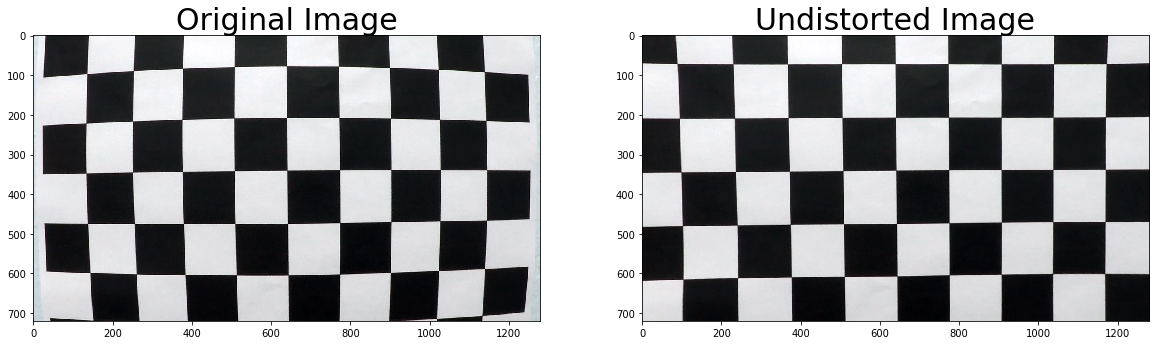

In [8]:
test_img_chessboard = cv2.imread('camera_cal/calibration1.jpg')

destination_image_chessboard = cv2.undistort(test_img_chessboard, mtx, dist, None, mtx)
cv2.imwrite('output_images/test_undist_1.jpg',destination_image_chessboard)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Original Image', fontsize=30)
ax2.set_title('Undistorted Image', fontsize=30)
ax1.imshow(test_img_chessboard)
ax2.imshow(destination_image_chessboard)

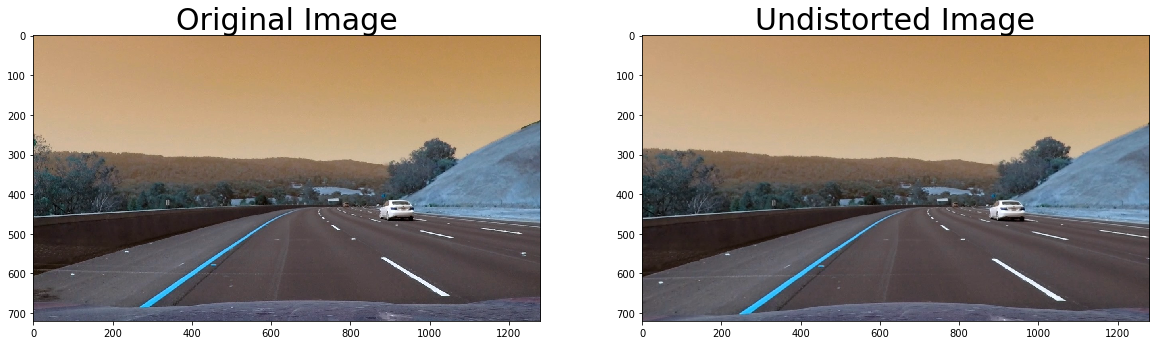

In [9]:
test_img = cv2.imread('test_images/test3.jpg')

destination_image = cv2.undistort(test_img, mtx, dist, None, mtx)
cv2.imwrite('output_images/test_undist_2.jpg',destination_image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Original Image', fontsize=30)
ax2.set_title('Undistorted Image', fontsize=30)
ax1.imshow(test_img)
ax2.imshow(destination_image)

## 2. Use various aspects of gradient measurements to isolate lane-line pixels: 

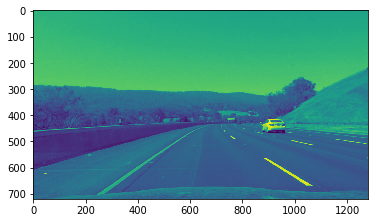

In [10]:
gray = cv2.cvtColor(destination_image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

### 2.1 Calculate the derivative in x and y direction

In [11]:
#Define kernel if beyond default kernel size of 3
#Taking the gradient over larger regions can smooth over noisy intensity fluctuations on small scales. 
sobel_kernel = 9

In [12]:
#Calculate the derivative in the x direction (the 1, 0 at the end denotes x direction) using CV_64F datatype
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    
#Calculate the derivative in the y direction (the 0, 1 at the end denotes yy direction)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)

#print(sobelx)
#print(sobely)

**Data engineering**

Calculate the absolute value of the derivatives and convert the absolute value images back to 8-bit so negative slopes are not missed in edge detection. https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html

In [13]:
abs_sobelx = np.absolute(sobelx)
abs_sobely = np.absolute(sobely)

eight_bit_sobel_x = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
eight_bit_sobel_y = np.uint8(255*abs_sobely/np.max(abs_sobely))

print(eight_bit_sobel_x)
print(eight_bit_sobel_y)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 1 1 ..., 4 2 0]
 [0 1 1 ..., 6 3 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 2 5 6]
 [0 0 0 ..., 0 3 3]
 [0 0 0 ..., 0 0 0]]


**Binary threshold to select pixels based on gradient strength in x and y direction**

In [14]:
# threshold can range form 0 to 255 (pixels)
thresh_min = 35
thresh_max = 200
sobel_x_binary = np.zeros_like(eight_bit_sobel_x)
sobel_y_binary = np.zeros_like(eight_bit_sobel_y)
sobel_x_binary[(eight_bit_sobel_x >= thresh_min) & (eight_bit_sobel_x <= thresh_max)] = 1
sobel_y_binary[(eight_bit_sobel_y >= thresh_min) & (eight_bit_sobel_y <= thresh_max)] = 1

#print(sobel_x_binary)
#print(sobel_y_binary)

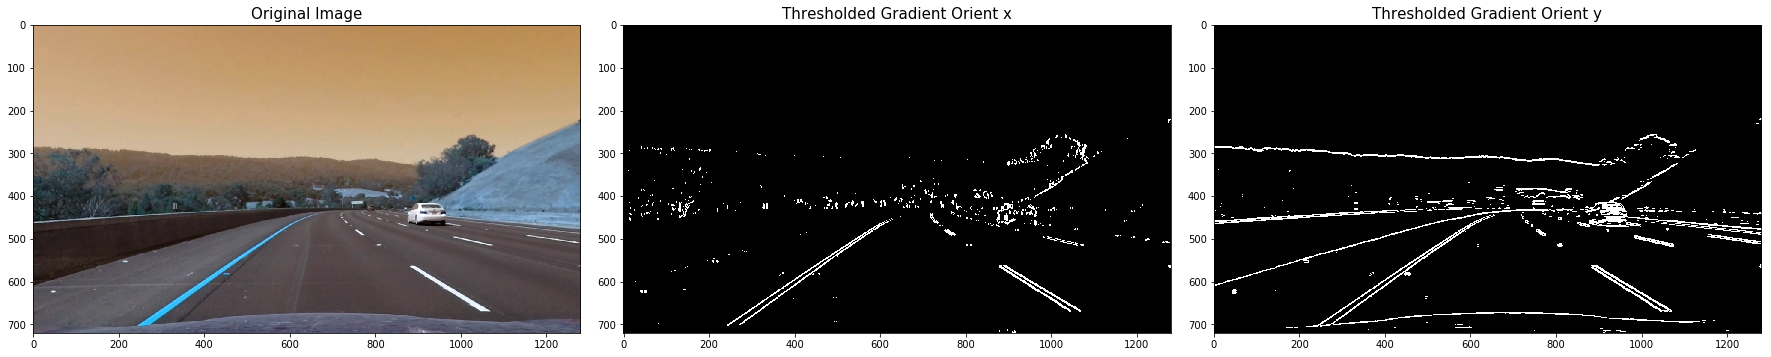

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(destination_image)
ax1.set_title('Original Image', fontsize=15)
ax2.imshow(sobel_x_binary, cmap='gray')
ax2.set_title('Thresholded Gradient Orient x', fontsize=15)
ax3.imshow(sobel_y_binary, cmap='gray')
ax3.set_title('Thresholded Gradient Orient y', fontsize=15)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### 2.2 Combined magnitude of the x and y gradient

In [16]:
abs_sobelxy = np.sqrt(sobelx**2 + sobely**2)
eight_bit_sobel_xy = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
print(eight_bit_sobel_xy)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 1 1 ..., 2 5 6]
 [0 1 1 ..., 3 3 3]
 [0 1 1 ..., 4 2 0]]


In [17]:
sobel_xy_combined_binary = np.zeros_like(eight_bit_sobel_xy)
sobel_xy_combined_binary[(eight_bit_sobel_xy >= thresh_min) & (eight_bit_sobel_xy <= thresh_max)] = 1
#print(sobel_xy_combined_binary)

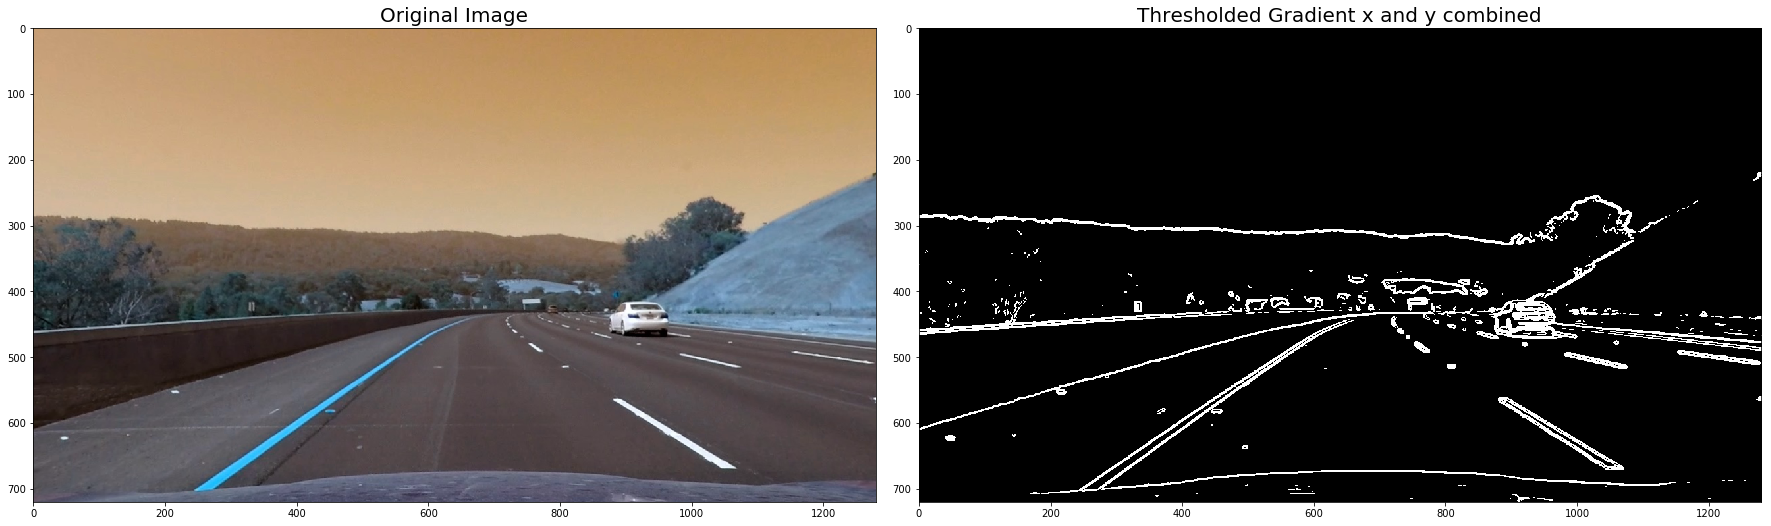

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(destination_image)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(sobel_xy_combined_binary, cmap='gray')
ax2.set_title('Thresholded Gradient x and y combined', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### 2.3 Gradient Direction

In [19]:
gradient_direction = np.arctan(abs_sobely/abs_sobelx)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [20]:
#3 Threshold can vary from 0 to pi/2 (radians)
thresh_min = 0.6
thresh_max = 1.2
gradient_direction_binary_output = np.zeros_like(gradient_direction)
gradient_direction_binary_output[(gradient_direction >= thresh_min) & (gradient_direction <= thresh_max)] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater_equal
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less_equal
  """


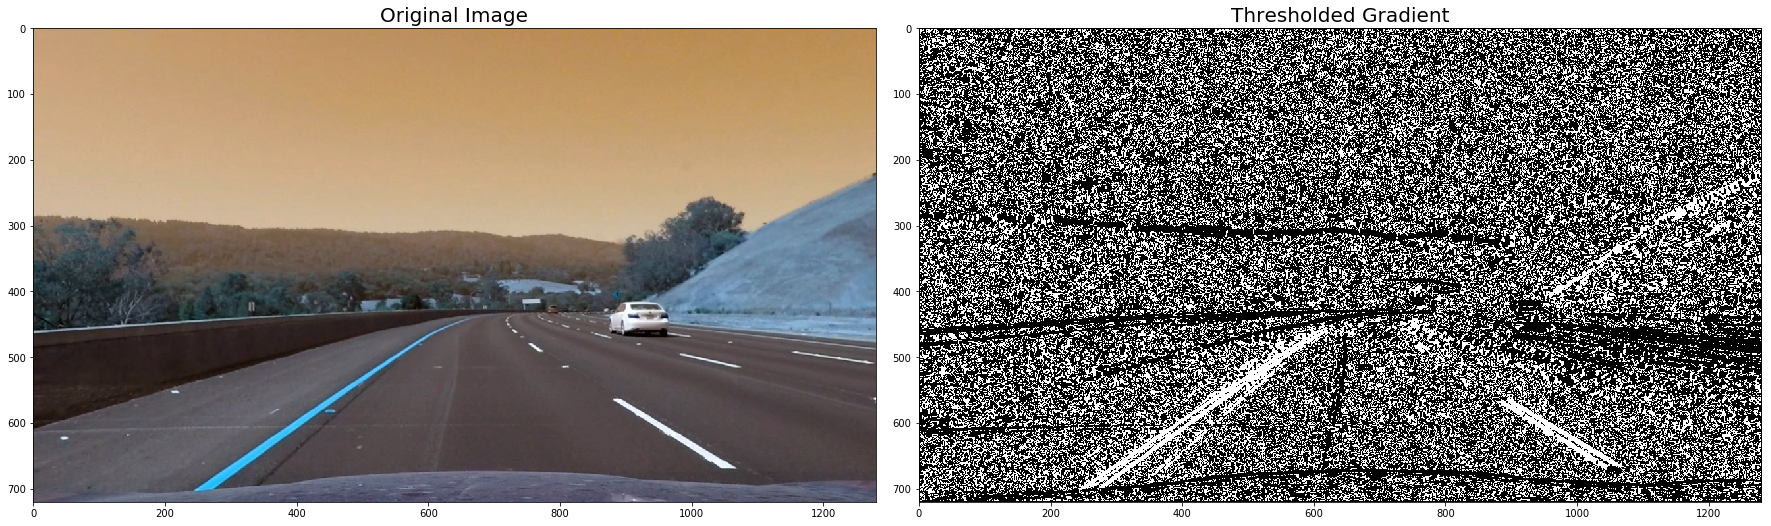

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(destination_image)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(gradient_direction_binary_output, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### 2.4 Combined gradient thresholds

Use various aspects of gradient measurements to isolate lane-line pixels: 

2.4.1 x and y gradients<br>
Create a binary threshold to select pixels based on **gradient strength for derivatives** calculated in the x and y direction

2.4.2 overall gradient magnitude<br>
Apply the combined magnitude of the x and y gradient. The **magnitude of the gradient** is the maximum rate of change at the point.

2.4.3 gradient direction <br>
The **direction of the gradien**t is much noisier than the gradient magnitude, but you should find that you can pick out particular features by orientation.

**Combination testing**

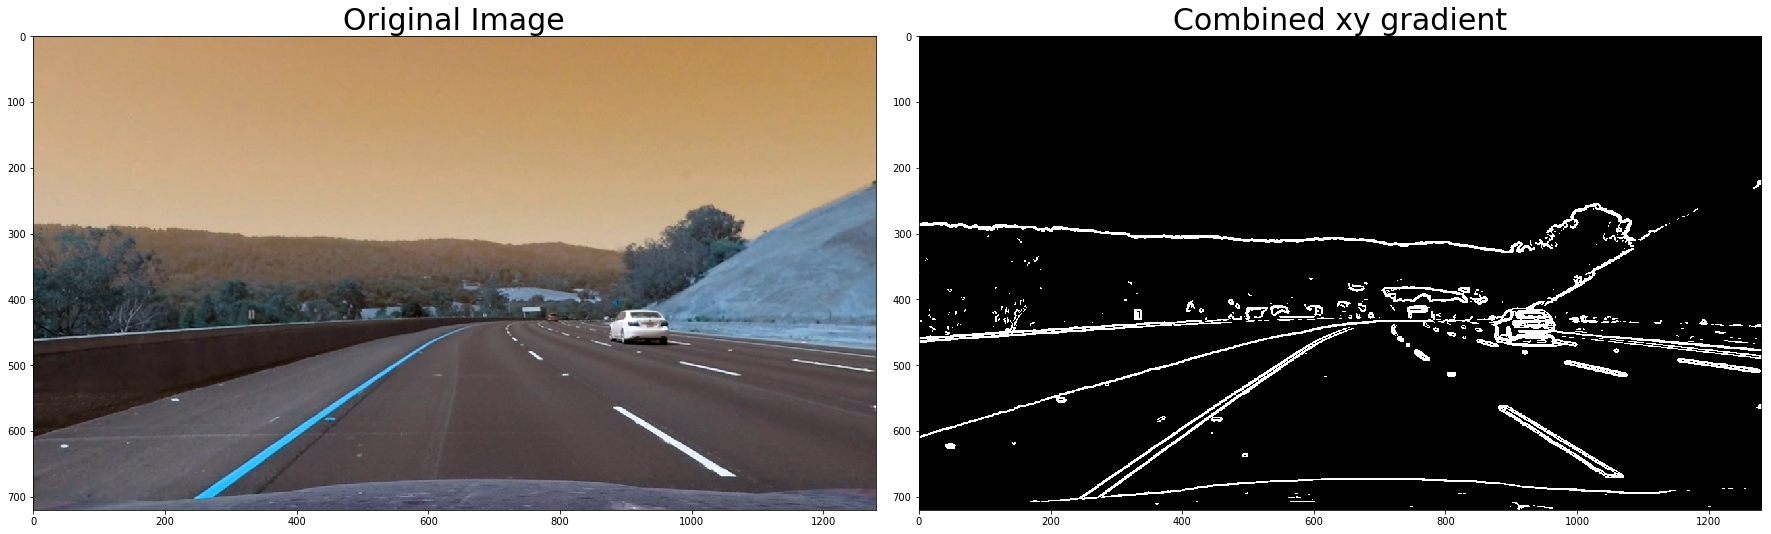

In [22]:
combined = np.zeros_like(gradient_direction_binary_output)
combined[(sobel_xy_combined_binary == 1)] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(destination_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Combined xy gradient', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

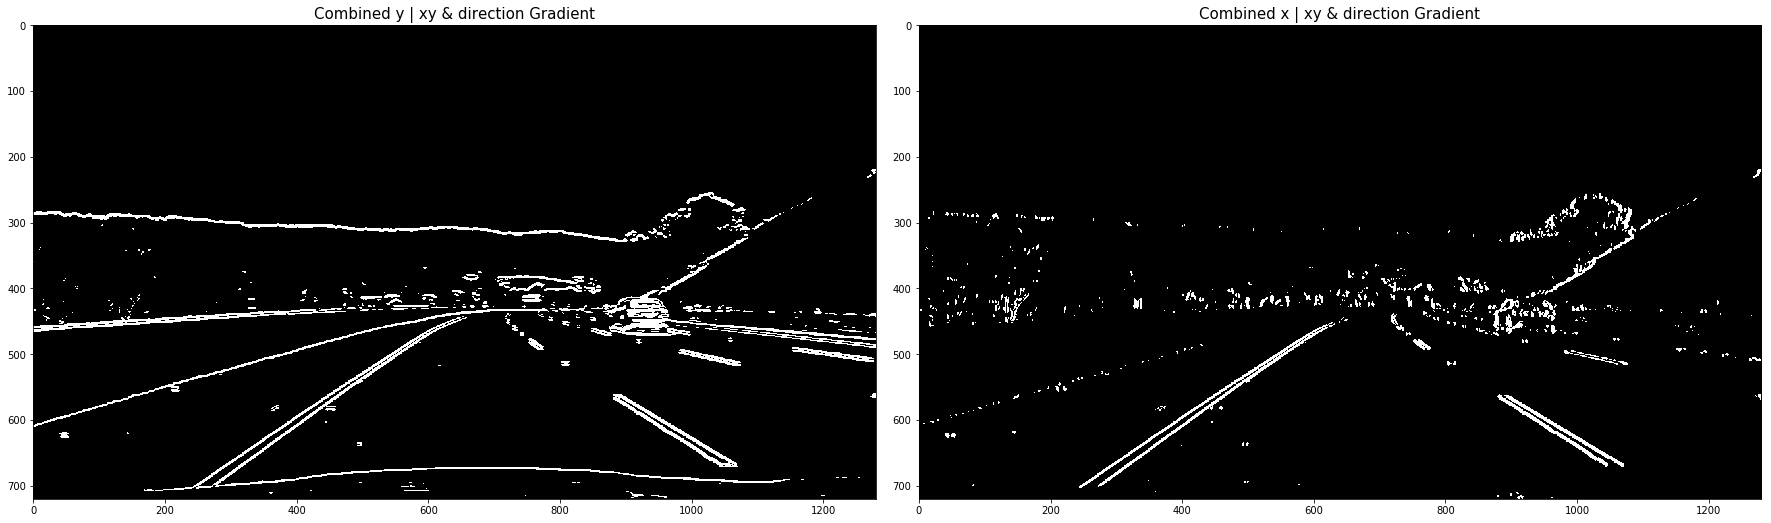

In [23]:
combined_2 = np.zeros_like(gradient_direction_binary_output)
combined_3 = np.zeros_like(gradient_direction_binary_output)

combined_2[(sobel_y_binary == 1) | (sobel_xy_combined_binary == 1) & (gradient_direction_binary_output == 1)] = 1
combined_3[(sobel_x_binary == 1) | (sobel_xy_combined_binary == 1) & (gradient_direction_binary_output == 1)] = 1

f, (ax2, ax3) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax2.imshow(combined_2, cmap='gray')
ax2.set_title('Combined y | xy & direction Gradient', fontsize=15)
ax3.imshow(combined_3, cmap='gray')
ax3.set_title('Combined x | xy & direction Gradient', fontsize=15)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

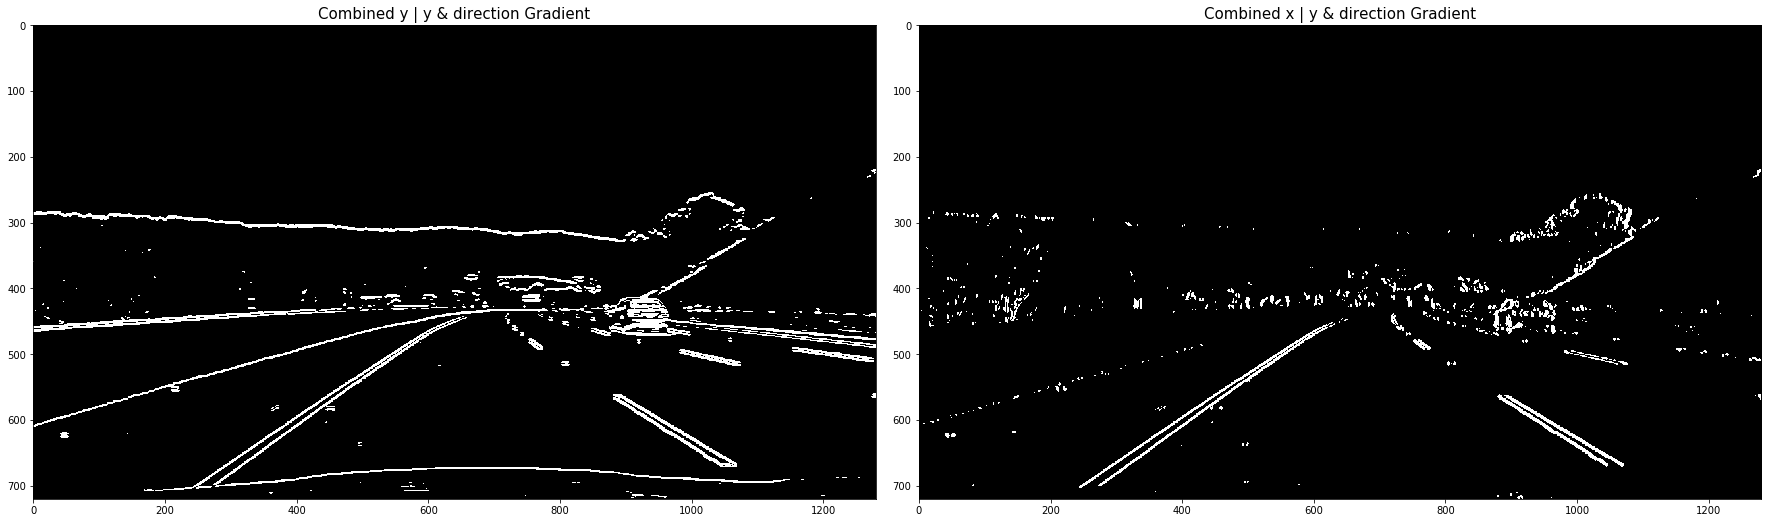

In [24]:
combined_4 = np.zeros_like(gradient_direction_binary_output)
combined_5 = np.zeros_like(gradient_direction_binary_output)

combined_4[(sobel_y_binary == 1) | (sobel_y_binary == 1) & (gradient_direction_binary_output == 1)] = 1
combined_5[(sobel_x_binary == 1) | (sobel_y_binary == 1) & (gradient_direction_binary_output == 1)] = 1

f, (ax2, ax3) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax2.imshow(combined_4, cmap='gray')
ax2.set_title('Combined y | y & direction Gradient', fontsize=15)
ax3.imshow(combined_5, cmap='gray')
ax3.set_title('Combined x | y & direction Gradient', fontsize=15)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

**Conclusion**
'Combined y | xy & direction Gradient' draws lane lines further and clearer than combined xy gradient only or other testing options 

**Final result**

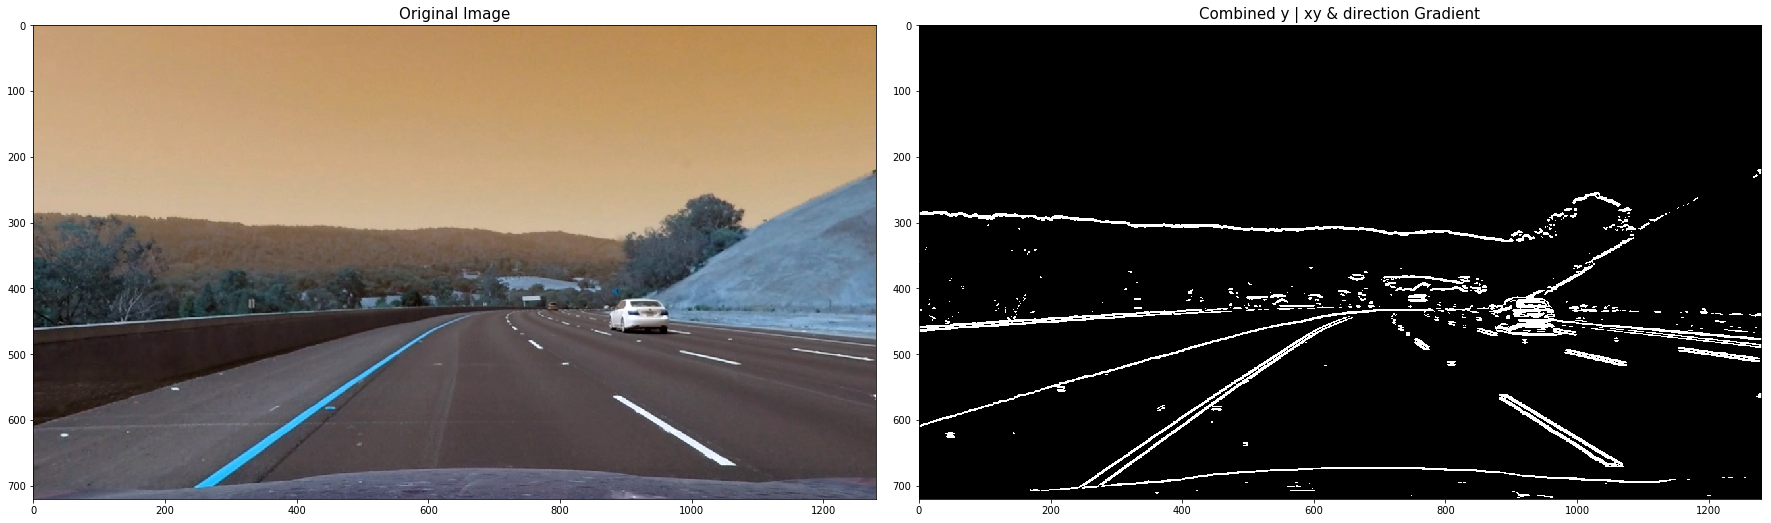

In [25]:
combined_gradient = np.zeros_like(gradient_direction_binary_output)
combined_gradient[(sobel_y_binary == 1) | (sobel_xy_combined_binary == 1) & (gradient_direction_binary_output == 1)] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(destination_image)
ax1.set_title('Original Image', fontsize=15)
ax2.imshow(combined_gradient, cmap='gray')
ax2.set_title('Combined y | xy & direction Gradient', fontsize=15)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### 3. Use various aspects of your colour measurements to isolate lane-line pixels: 

**S channel** picks up the lines under very different color and contrast conditions and is hence more robust to changing conditions<br>
**L channel** to pick up lanes under different lighting conditions

In [26]:
hls = cv2.cvtColor(destination_image, cv2.COLOR_RGB2HLS)
L = hls[:,:,1]
S = hls[:,:,2]

thresh_l = (200, 255)
binary_l = np.zeros_like(S)
binary_l[(L > thresh_l[0]) & (L <= thresh_l[1])] = 1

thresh_s = (170, 255)
binary_s = np.zeros_like(S)
binary_s[(S > thresh_s[0]) & (S <= thresh_s[1])] = 1

In [27]:
print(L)

[[158 158 158 ..., 134 135 136]
 [158 158 158 ..., 134 134 136]
 [158 158 158 ..., 134 134 134]
 ..., 
 [ 95  95  95 ..., 101 102 102]
 [ 97  98  99 ..., 103 104 105]
 [ 94  94  94 ..., 102 104 106]]


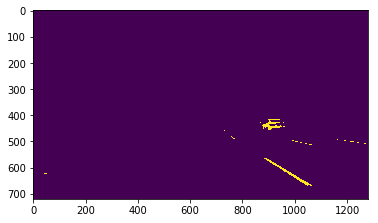

In [28]:
plt.imshow(binary_l)

In [29]:
print(S)

[[108 108 108 ..., 110 111 110]
 [108 108 108 ..., 110 109 110]
 [108 108 108 ..., 110 110 109]
 ..., 
 [ 21  21  21 ...,  30  29  30]
 [ 24  23  23 ...,  30  29  29]
 [ 23  23  23 ...,  34  32  33]]


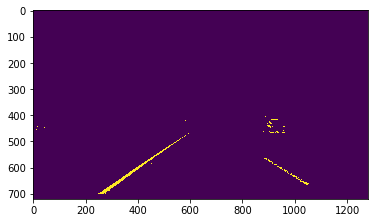

In [30]:
plt.imshow(binary_s)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


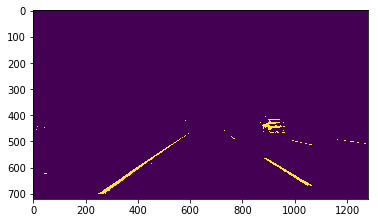

In [31]:
combined_colour = np.zeros_like(binary_s)
combined_colour[(binary_s == 1) | (binary_l == 1)] = 1
print(combined_colour)
plt.imshow(combined_colour)

**Test to show participation of different channels**

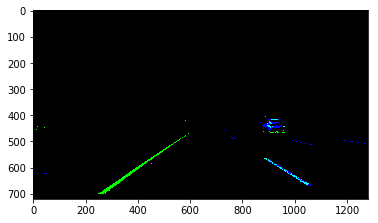

In [32]:
color_binary_L_S = np.dstack(( np.zeros_like(binary_s), binary_s, binary_l))*255
plt.imshow(color_binary_L_S)

### 3.3 Combine colour and gradient thresholds

In [33]:
combined_final = np.zeros_like(combined_gradient)
combined_final[(combined_gradient == 1) | (combined_colour == 1)] = 1

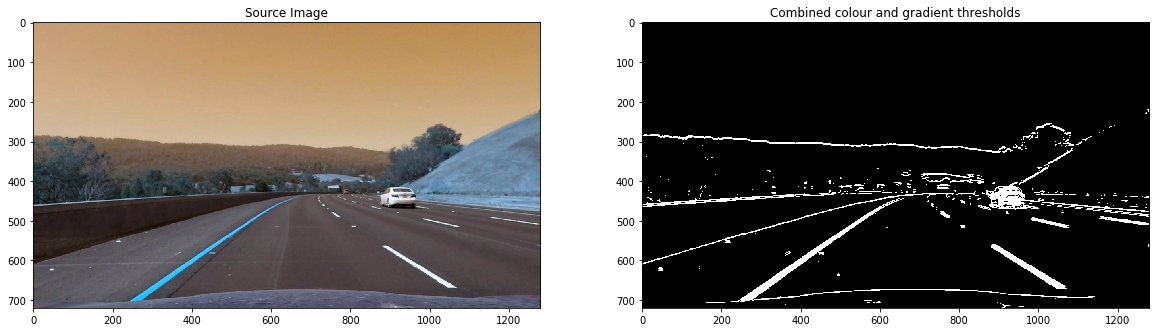

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Source Image')
ax1.imshow(destination_image)

ax2.set_title('Combined colour and gradient thresholds')
ax2.imshow(combined_final, cmap='gray')

## 4. Perspective Transform 

**Assumption:** road is a flat plane as approximation <br>
**Source points** in a trapezoidal shape (similar to region masking) represent a rectangle in undistorted image (bird eye view)

### 4.1 Perspective Transform on straight lines

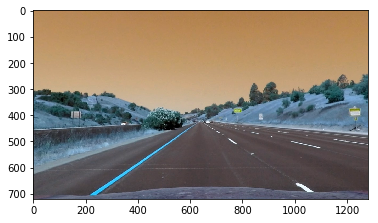

In [35]:
pt_img = cv2.imread('test_images/straight_lines1.jpg')
pt_img = cv2.undistort(pt_img, mtx, dist, None, mtx)
gray = cv2.cvtColor(pt_img, cv2.COLOR_RGB2GRAY)
plt.imshow(pt_img)

In [36]:
imshape = pt_img.shape
print(imshape)
print(img_size)

(720, 1280, 3)
(1280, 720)


In [37]:
src = np.float32([(150,imshape[0]),(600, 470), (750, 470), (1150,imshape[0])])
dst = np.float32([(350,imshape[0]),(400, 0), (1000, 0), (950,imshape[0])])
M = cv2.getPerspectiveTransform(src, dst)
bird_view = cv2.warpPerspective(destination_image, M, img_size, flags=cv2.INTER_LINEAR)

(720, 1280, 3)


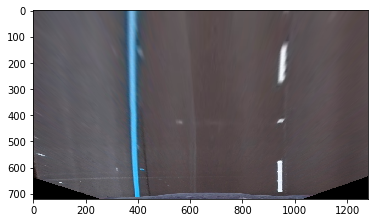

In [38]:
print(bird_view.shape)
plt.imshow(bird_view)

Text(0.5,1,'Undistorted and Warped Straight line Image')

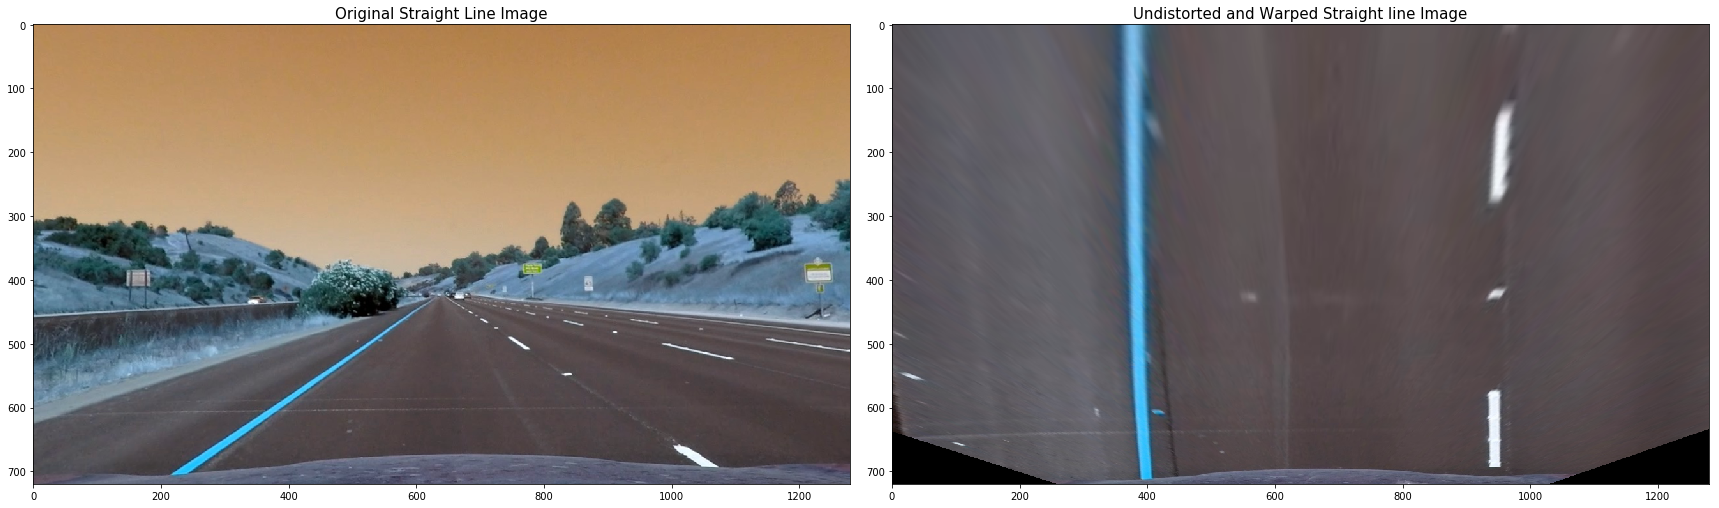

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(pt_img)
ax1.set_title('Original Straight Line Image', fontsize=15)
ax2.imshow(bird_view)
ax2.set_title('Undistorted and Warped Straight line Image', fontsize=15)

### 4.2 Perspective Transform on test image

In [40]:
imshape = destination_image.shape
print(imshape)

(720, 1280, 3)


In [41]:
src = np.float32([(150,imshape[0]),(600, 470), (750, 470), (1150,imshape[0])])
dst = np.float32([(350,imshape[0]),(400, 0), (1000, 0), (950,imshape[0])])
M = cv2.getPerspectiveTransform(src, dst)
bird_view = cv2.warpPerspective(destination_image, M, img_size, flags=cv2.INTER_LINEAR)

Text(0.5,1,'Undistorted and Warped Test Image')

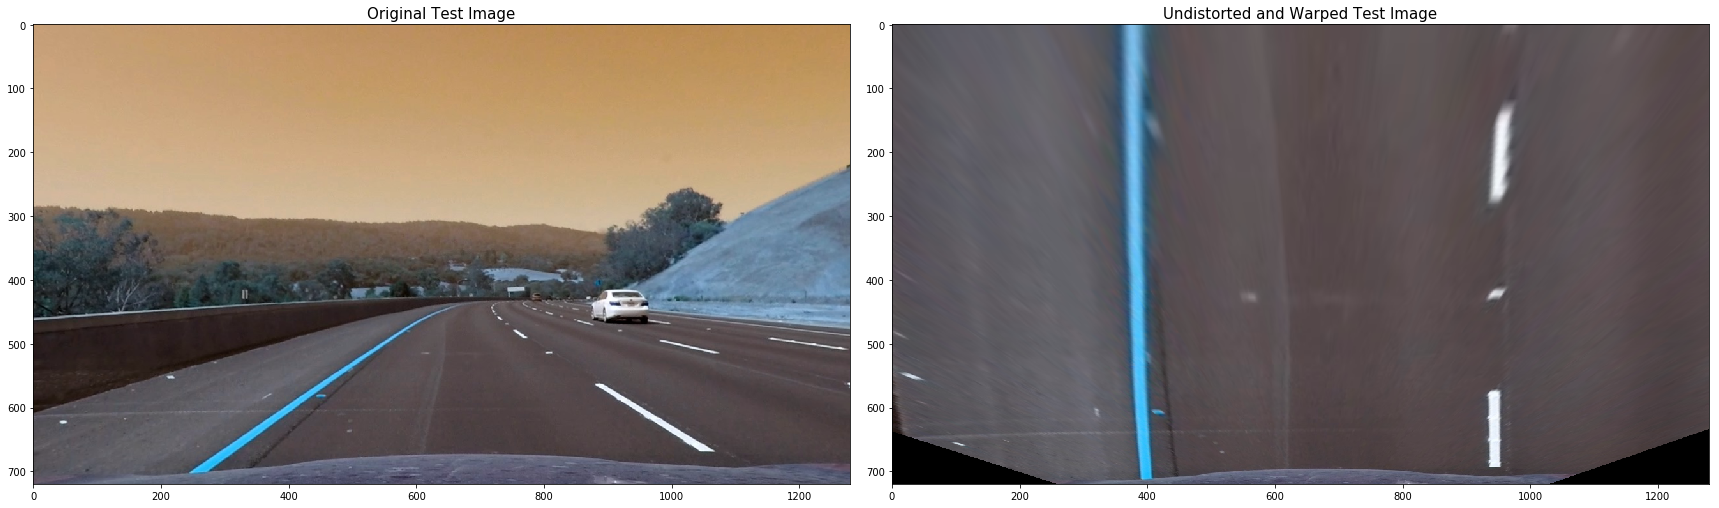

In [42]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(destination_image)
ax1.set_title('Original Test Image', fontsize=15)
ax2.imshow(bird_view)
ax2.set_title('Undistorted and Warped Test Image', fontsize=15)

In [43]:
bird_view_threshold = cv2.warpPerspective(combined_final, M, img_size, flags=cv2.INTER_LINEAR)
binary_warped = bird_view_threshold

Text(0.5,1,'Undistorted and Warped Test Image')

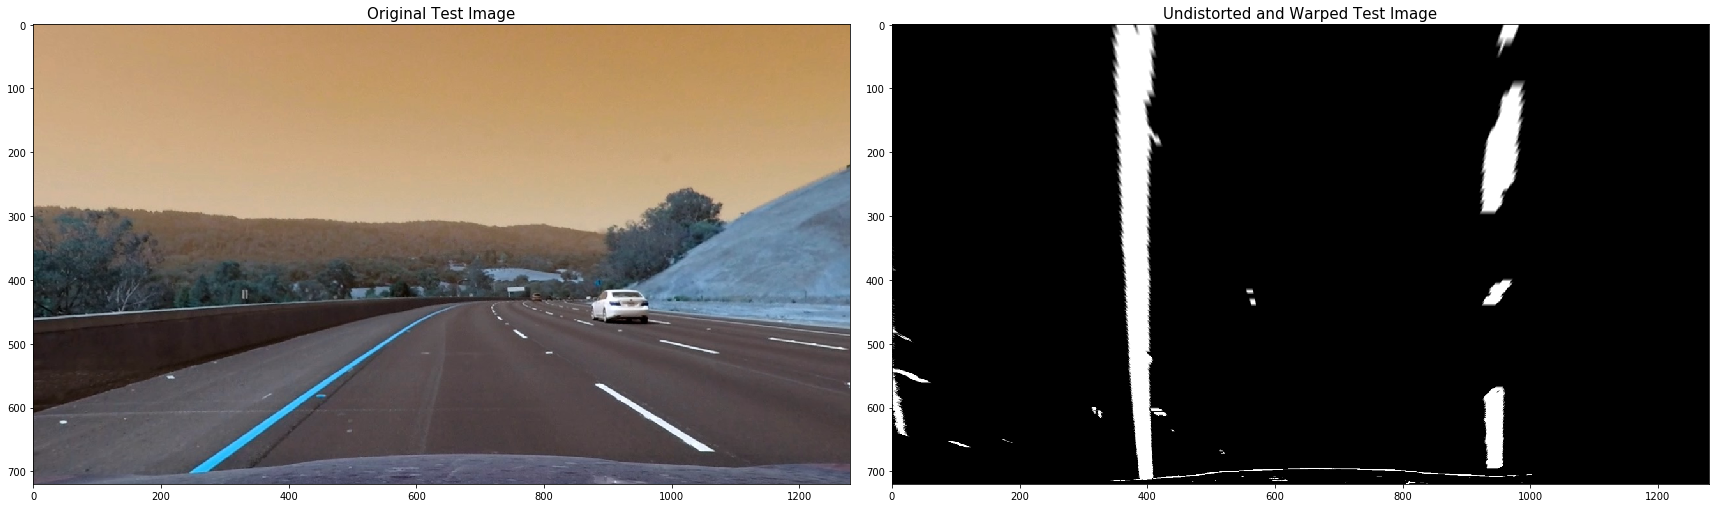

In [44]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(destination_image)
ax1.set_title('Original Test Image', fontsize=15)
ax2.imshow(bird_view_threshold, cmap='gray')
ax2.set_title('Undistorted and Warped Test Image', fontsize=15)

## 5. Detect lane pixels and fit to find the lane boundary

- Decide explicitly which pixels are part of the lines and which belong to the left line and which belong to the right line.
- Plotting a histogram of where the binary activations occur across the image

### 5.1 Histogram to define starting point of lane line detection

With this histogram we are adding up the pixel values along each column in the image. In our thresholded binary image, pixels are either 0 or 1, so the two most prominent peaks in this histogram will be good indicators of the x-position of the base of the lane lines. We can use that as a starting point for where to search for the lines. 

In [45]:
# bird_view_threshold = binary image
print(bird_view_threshold)
print(bird_view_threshold.shape)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(720, 1280)


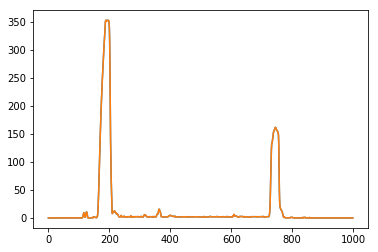

In [46]:
# Apply histogram to lower part of the image to determine location of the lane lines by simply summing binary image pixel
# // for “floor” division (rounds down to nearest whole number)
# cropping image to region of interest to avoid detection of non lane lines

histogram = np.sum(bird_view_threshold[bird_view_threshold.shape[0]//2:,200:1200], axis=0)
plt.plot(histogram)

plt.plot(histogram)

### 5.2 Sliding Window

From histogram detected starting point we can use a sliding window, placed around the line centers, to find and follow the lines up to the top of the frame.

**5.2.1 Set sliding window hyperparameters**

389


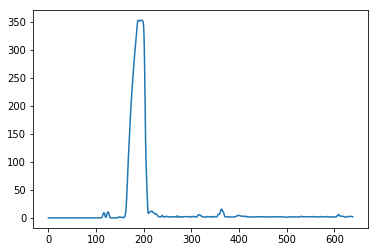

In [47]:
# 1. Choose the number of sliding windows
nwindows = 9
# 2. Set the width of the windows +/- margin
margin = 100
# 3. Set minimum number of pixels found to recenter window
minpix = 50
# 4. Set height of windows - based on nwindows above and image shape
window_height = np.int(bird_view_threshold.shape[0]//nwindows)
# 5. Set window starting point for left and right lane 
# Argmax returns the indices of the maximum values along the y axis
midpoint = np.int(bird_view_threshold.shape[1]//2)
left_lane_x_current = np.argmax(histogram[:midpoint]) + 200
right_lane_x_current = np.argmax(histogram[midpoint:])+ 200 + midpoint

print(left_lane_x_current)
plt.plot(histogram[:midpoint])

945


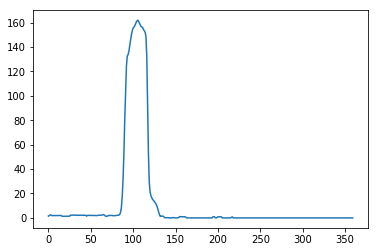

In [48]:
print(right_lane_x_current)
plt.plot(histogram[midpoint:])

**5.2.2 Iterate through nwindows to track curvature**

In [49]:
# Create channel 3 image for colouring/testing
print(bird_view_threshold.shape)
bird_view_threshold = np.dstack((bird_view_threshold, bird_view_threshold, bird_view_threshold))*255
print(bird_view_threshold.shape)

(720, 1280)
(720, 1280, 3)


Loop through each window in nwindows
1. Find the boundaries of our current window. This is based on a combination of the current window's starting point (leftx_current and rightx_current), as well as the margin you set in the hyperparameters.
2. Use cv2.rectangle to draw these window boundaries onto our binary thresholded image
3. Now that we know the boundaries of our window, find out which activated pixels from nonzeroy and nonzerox above actually fall into the window.
4. Append these to our lists left_lane_inds and right_lane_inds.
5. If the number of pixels you found in Step 4 are greater than your hyperparameter minpix, re-center our window (i.e. leftx_current or rightx_current) based on the mean position of these pixels.

[380 380 380 ..., 472 472 472] [640 640 640 ..., 716 716 716] [929 929 929 ..., 988 988 988] [640 640 640 ..., 717 717 717]
[371 371 371 ..., 406 406 406] [560 560 560 ..., 639 639 639] [945 945 945 ..., 957 957 957] [567 567 567 ..., 639 639 639]
[367 367 367 ..., 404 404 404] [480 480 480 ..., 559 559 559] [] []
[362 362 362 ..., 403 403 403] [400 400 400 ..., 479 479 479] [956 956 956 ..., 945 945 945] [400 400 400 ..., 441 441 441]
[359 359 359 ..., 405 405 405] [320 320 320 ..., 399 399 399] [957 957 957 958 958 958 959 959 959 960 960 960 961 961 961 962 962 962
 963 963 963 964 964 964 965 965 965 966 966 966 967 967 967 968 968 968
 969 969 969 970 970 970 971 971 971 972 972 972 973 973 973 956 956 956
 957 957 957 958 958 958 959 959 959 960 960 960 961 961 961 962 962 962
 963 963 963 964 964 964 965 965 965 966 966 966 967 967 967 968 968 968
 969 969 969 970 970 970 971 971 971 972 972 972] [398 398 398 398 398 398 398 398 398 398 398 398 398 398 398 398 398 398
 398 398 3

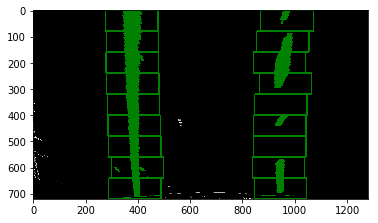

In [50]:
# Identify the nonzero pixels in x and y
nonzero = bird_view_threshold.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])

leftx_poly = []
lefty_poly = []
rightx_poly = []
righty_poly = []
    
for i in range(nwindows):
        
    # Identify window boundaries - Top and bottom 
    win_y_low = bird_view_threshold.shape[0] - (i+1)*window_height
    win_y_high = bird_view_threshold.shape[0] - i*window_height

    # Identify window boundaries - left lane window    
    win_xleft_low = left_lane_x_current - margin
    win_xleft_high = left_lane_x_current + margin

    # Identify window boundaries - right lane window     
    win_xright_low = right_lane_x_current - margin
    win_xright_high = right_lane_x_current + margin

    # Draw the rectangle windows on the visualization image with HLS colour coding
    cv2.rectangle(bird_view_threshold,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,127,255), 3) 
    cv2.rectangle(bird_view_threshold,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,127,255), 3) 

    # Check for all values in nonzeroy array if value is within window of left and right lane
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) &
                          (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]

    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) &
                       (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]

    # Create empty lists to receive left and right lane pixel indices and append
    left_lane_inds = []
    right_lane_inds = []

    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)

    # If you found > minpix pixels (sliding window hyperparameter), recenter next window on their mean position
    if len(good_left_inds) > minpix:
        left_lane_x_current = np.int(np.mean(nonzerox[good_left_inds]))

    if len(good_right_inds) > minpix:
        right_lane_x_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (currently list of lists of pixels)
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Colour pixels on image
    bird_view_threshold[lefty, leftx] = [0,127,255]
    bird_view_threshold[righty, rightx] = [0,127,255]

    # Append pixels within windows to list for polynomial
    leftx_poly.append(leftx)
    lefty_poly.append(lefty)
    rightx_poly.append(rightx)
    righty_poly.append(righty)
       
    print(leftx, lefty, rightx, righty)
    plt.imshow(bird_view_threshold)  

In [51]:
print(leftx_poly)

[array([380, 380, 380, ..., 472, 472, 472]), array([371, 371, 371, ..., 406, 406, 406]), array([367, 367, 367, ..., 404, 404, 404]), array([362, 362, 362, ..., 403, 403, 403]), array([359, 359, 359, ..., 405, 405, 405]), array([353, 353, 353, ..., 405, 405, 405]), array([349, 349, 349, ..., 404, 404, 404]), array([345, 345, 345, ..., 406, 406, 406]), array([349, 349, 349, ..., 413, 413, 413])]


In [52]:
leftx_poly = np.concatenate(leftx_poly)
lefty_poly = np.concatenate(lefty_poly)
rightx_poly = np.concatenate(rightx_poly)
righty_poly = np.concatenate(righty_poly)
print(leftx_poly)

[380 380 380 ..., 413 413 413]


In [53]:
res = [] 

for i in leftx_poly: 
    res.append(i) 

print(res)

[380, 380, 380, 381, 381, 381, 382, 382, 382, 383, 383, 383, 384, 384, 384, 385, 385, 385, 386, 386, 386, 387, 387, 387, 388, 388, 388, 389, 389, 389, 390, 390, 390, 391, 391, 391, 392, 392, 392, 393, 393, 393, 394, 394, 394, 395, 395, 395, 396, 396, 396, 397, 397, 397, 398, 398, 398, 399, 399, 399, 400, 400, 400, 401, 401, 401, 402, 402, 402, 403, 403, 403, 404, 404, 404, 405, 405, 405, 406, 406, 406, 379, 379, 379, 380, 380, 380, 381, 381, 381, 382, 382, 382, 383, 383, 383, 384, 384, 384, 385, 385, 385, 386, 386, 386, 387, 387, 387, 388, 388, 388, 389, 389, 389, 390, 390, 390, 391, 391, 391, 392, 392, 392, 393, 393, 393, 394, 394, 394, 395, 395, 395, 396, 396, 396, 397, 397, 397, 398, 398, 398, 399, 399, 399, 400, 400, 400, 401, 401, 401, 402, 402, 402, 403, 403, 403, 404, 404, 404, 405, 405, 405, 406, 406, 406, 379, 379, 379, 380, 380, 380, 381, 381, 381, 382, 382, 382, 383, 383, 383, 384, 384, 384, 385, 385, 385, 386, 386, 386, 387, 387, 387, 388, 388, 388, 389, 389, 389, 390, 390,

**5.2.3 Apply 2-degree polynomial on pixels detected and newly generated pixels for plotting** <br>
Polynomial is used in numerical analysis to approximate lane lines curvature <br>
Degree 2 polynomial represents a quadratic function: f(x) = a*x2 + b*x + c

(720, 0)

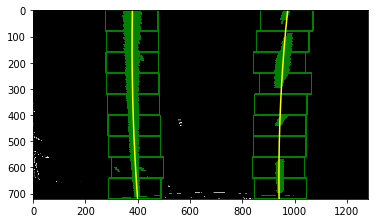

In [54]:
# Use existing pixels to derive variables a,b and c of quadratic function (2 degree polynomial)
left_fit = np.polyfit(lefty_poly, leftx_poly, 2)
right_fit = np.polyfit(righty_poly, rightx_poly, 2)
    
# Plot variables into polynomial to generate additional y values for plotting based on newly generated y values
ploty = np.linspace(0, bird_view_threshold.shape[0]-1, bird_view_threshold.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        
# Plot polynomial on pixels in sliding windows
plt.imshow(bird_view_threshold)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [55]:
print(left_fit)

[  6.24847441e-05  -1.75306676e-02   3.79700545e+02]


**5.2.4 Polynomial approximation + margin on remaining video frames** <br><br>
Background: increase efficiency since once you know where the lines are in one frame of video, you can do a highly targeted search in the next frame

**Approach**
1. Search within a margin (new hyperparameter) around the previous lane line position fitted using the polynomial function 
2. If you lines are lost, go back to sliding windows search to redefine position

In [56]:
# Choose the width of the margin (hyperparameter) around the previous polynomial to search
margin_poly = 100

# Set the area of search based on activated x-values within the +/- margin of the polynomial function
left_lane_inds_poly = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin_poly)) & 
                       (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin_poly)))
right_lane_inds_poly = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin_poly)) & 
                        (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin_poly)))
    
# Extract left and right line pixel positions
leftx_poly_2 = nonzerox[left_lane_inds_poly]
lefty_poly_2 = nonzeroy[left_lane_inds_poly] 
rightx_poly_2 = nonzerox[right_lane_inds_poly]
righty_poly_2 = nonzeroy[right_lane_inds_poly]

# Fit new polynomials
# Use existing pixels to derive variables a,b and c of quadratic function (2 degree polynomial)
left_fit_poly = np.polyfit(lefty_poly_2, leftx_poly_2, 2)
right_fit_poly = np.polyfit(righty_poly_2, rightx_poly_2, 2)
    
# Plot variables into polynomial to generate additional y values for plotting based on newly generated y values
left_fitx_poly = left_fit_poly[0]*ploty**2 + left_fit_poly[1]*ploty + left_fit_poly[2]
right_fitx_poly = right_fit_poly[0]*ploty**2 + right_fit_poly[1]*ploty + right_fit_poly[2]

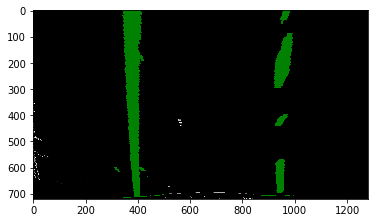

In [57]:
## Visualization ##

# Color in left and right line pixels
out_img_poly = np.dstack((binary_warped, binary_warped, binary_warped))*255
out_img_poly[nonzeroy[left_lane_inds_poly], nonzerox[left_lane_inds_poly]] = [0,127,255]
out_img_poly[nonzeroy[right_lane_inds_poly], nonzerox[right_lane_inds_poly]] = [0,127,255]

plt.imshow(out_img_poly)

In [58]:
# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
# np.transpose: match x with y values 
# np.hstack: stack arrays in sequence horizontally (column wise) ~ concatenation for pixel arrays
# np.vstack: stack arrays in sequence vertically (row wise) ~ concatenation for pixel arrays
# np.flipud: flip the entries in each column in the up/down direction. Rows are preserved, but appear in a different order than before.

left_line_window1 = np.array([np.transpose(np.vstack([left_fitx_poly-margin_poly, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx_poly+margin_poly, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
    
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx_poly-margin_poly, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx_poly+margin_poly, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

print(right_line_pts)

[[[  8.72922392e+02   0.00000000e+00]
  [  8.72820210e+02   1.00000000e+00]
  [  8.72718184e+02   2.00000000e+00]
  ..., 
  [  1.07271818e+03   2.00000000e+00]
  [  1.07282021e+03   1.00000000e+00]
  [  1.07292239e+03   0.00000000e+00]]]


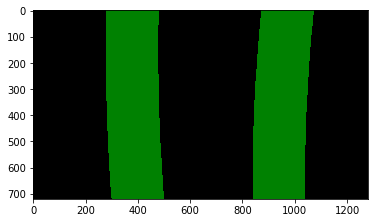

In [59]:
# Draw the lane onto the warped blank image
blank_image = np.zeros_like(out_img_poly)
cv2.fillPoly(blank_image, np.int_([left_line_pts]), (0,127,255))
cv2.fillPoly(blank_image, np.int_([right_line_pts]), (0,127,255))
result = cv2.addWeighted(out_img_poly, 1, blank_image, 0.3, 0)

plt.imshow(result)
plt.imshow(blank_image)

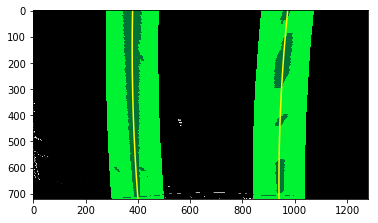

In [60]:
# Plot the polynomial lines onto the image
plt.plot(left_fitx_poly, ploty, color='yellow')
plt.plot(right_fitx_poly, ploty, color='yellow')
    
#plt.imshow(binary_warped, cmap = 'gray')
plt.imshow(result)

### 5.3 Measuring Curvature - Sanity check

![alt text](mathematical_formulas/Curvature_1.png "Title")
![alt text](mathematical_formulas/Curvature_2.png "Title")
![alt text](mathematical_formulas/Curvature_3.png "Title")


Fitting of f(y), rather than f(x), because the lane lines in the warped image are near vertical and may have the same x value for more than one y value.

In [61]:
# Define conversions in x and y from pixels space to meters
# U.S. regulations require a minimum lane width of 12 feet or 3.7 meters
# & dashed lane lines are 10 feet or 3 meters long each.

ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Define y-value where we want radius of curvature
# We'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)
    
# Calculation of R_curve (radius of curvature)
left_curverad_pixel = ((1 + (2*left_fit[0]*y_eval*ym_per_pix + left_fit[1]*xm_per_pix)**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad_pixel = ((1 + (2*right_fit[0]*y_eval*ym_per_pix + right_fit[1]*xm_per_pix)**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad_pixel)
print(right_curverad_pixel)

8002.11324702
6047.51031323


### 5.4 Drawing lane

In [62]:
# Create an image to draw the lines on
warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

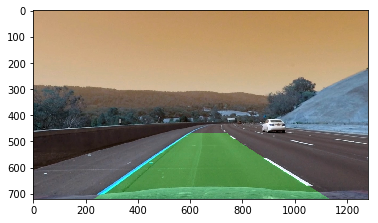

In [63]:
# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
Minv = cv2.getPerspectiveTransform(dst, src)
newwarp = cv2.warpPerspective(color_warp, Minv, (test_img.shape[1], test_img.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(destination_image, 1, newwarp, 0.3, 0)
plt.imshow(result)

## 6. Summary | Application on video frame

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib qt

In [2]:
# Calibrate camera and calculate camera matrix, distortion coefficients and camera position vectors

objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
objp = np.zeros((9*6,3), np.float32) 
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

images = glob.glob('camera_cal/calibration*.jpg')

for idx, image in enumerate(images):

    ## 1 Preprocess image for cv2.findChessboardCorners function 
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ## 2 Find the chessboard corners
    nx = 9 # the number of inside corners in x
    ny = 6 # the number of inside corners in y
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    ## 3 If found, add object points and image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
    ## 4 Draw and display the corners
    img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
    
img_size = (gray.shape[1], gray.shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

In [17]:
def Pre_processing(test_img):
    
    #1 Undistort
    destination_image = cv2.undistort(test_img, mtx, dist, None, mtx)
    gray_destination_image = cv2.cvtColor(destination_image, cv2.COLOR_RGB2GRAY)

    #2 Gradient thresholds

    #2.1 sobel x and y
    sobel_kernel = 9
    sobelx = cv2.Sobel(gray_destination_image, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray_destination_image, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    eight_bit_sobel_x = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    eight_bit_sobel_y = np.uint8(255*abs_sobely/np.max(abs_sobely))
    thresh_min = 35
    thresh_max = 200
    sobel_x_binary = np.zeros_like(eight_bit_sobel_x)
    sobel_y_binary = np.zeros_like(eight_bit_sobel_y)
    sobel_x_binary[(eight_bit_sobel_x >= thresh_min) & (eight_bit_sobel_x <= thresh_max)] = 1
    sobel_y_binary[(eight_bit_sobel_y >= thresh_min) & (eight_bit_sobel_y <= thresh_max)] = 1

    #2.2 sobel xy
    abs_sobelxy = np.sqrt(sobelx**2 + sobely**2)
    eight_bit_sobel_xy = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    sobel_xy_combined_binary = np.zeros_like(eight_bit_sobel_xy)
    sobel_xy_combined_binary[(eight_bit_sobel_xy >= thresh_min) & (eight_bit_sobel_xy <= thresh_max)] = 1
        
    #2.3 gradient direction
    gradient_direction = np.arctan(abs_sobely/abs_sobelx)
    thresh_min = 0.6
    thresh_max = 1.2
    gradient_direction_binary_output = np.zeros_like(gradient_direction)
    gradient_direction_binary_output[(gradient_direction >= thresh_min) & (gradient_direction <= thresh_max)] = 1

    #2.4 combined gradient thresholds
    combined_gradient = np.zeros_like(gradient_direction_binary_output)
    combined_gradient[(sobel_x_binary == 1) | (sobel_xy_combined_binary == 1) & (gradient_direction_binary_output == 1)] = 1

    #3 Colour thresholds
    hls = cv2.cvtColor(destination_image, cv2.COLOR_RGB2HLS)
    S = hls[:,:,2]
    L = hls[:,:,1]
    thresh_l = (200, 255)
    binary_l = np.zeros_like(S)
    binary_l[(L > thresh_l[0]) & (L <= thresh_l[1])] = 1
    thresh_s = (170, 255)
    binary_s = np.zeros_like(S)
    binary_s[(S > thresh_s[0]) & (S <= thresh_s[1])] = 1

    combined_colour = np.zeros_like(binary_s)
    combined_colour[(binary_s == 1) | (binary_l == 1)] = 1

    #4 Combined threshold and colour gradient
    combined_final = np.zeros_like(combined_gradient)
    combined_final[(combined_gradient == 1) | (combined_colour == 1)] = 1

    #5 Perspective transform
    imshape = (test_img.shape[0], test_img.shape[1])
    img_size = (test_img.shape[1], test_img.shape[0])
    src = np.float32([(150,imshape[0]),(600, 470), (750, 470), (1150,imshape[0])])
    dst = np.float32([(350,imshape[0]),(400, 0), (1000, 0), (950,imshape[0])])
    M = cv2.getPerspectiveTransform(src, dst)
    bird_view_threshold = cv2.warpPerspective(combined_final, M, img_size, flags=cv2.INTER_LINEAR)

#6 Histogram
    histogram = np.sum(bird_view_threshold[bird_view_threshold.shape[0]//2:,200:1200], axis=0)
    midpoint = np.int(bird_view_threshold.shape[1]//2)
    left_lane_x_current = np.argmax(histogram[:midpoint]) + 200
    right_lane_x_current = np.argmax(histogram[midpoint:])+ 200 + midpoint
     
#7 Sliding window
    
    #Window Variables
    nwindows = 9
    margin = 100
    minpix = 50
    window_height = np.int(bird_view_threshold.shape[0]//nwindows)
    bird_view_threshold = np.dstack((bird_view_threshold, bird_view_threshold, bird_view_threshold))*255
    
    #Source image pixel universe
    nonzero = bird_view_threshold.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    # Create empty lists to receive good left and right lane pixel from sliding windows output
    left_lane_inds = []
    right_lane_inds = []
    
    for i in range(nwindows):

        # Identify window boundaries - Top and bottom 
        win_y_low = bird_view_threshold.shape[0] - (i+1)*window_height
        win_y_high = bird_view_threshold.shape[0] - i*window_height

        # Identify window boundaries - left lane window    
        win_xleft_low = left_lane_x_current - margin
        win_xleft_high = left_lane_x_current + margin

        # Identify window boundaries - right lane window     
        win_xright_low = right_lane_x_current - margin
        win_xright_high = right_lane_x_current + margin
        
        # Draw the rectangle windows on the visualization image with HLS colour coding
        cv2.rectangle(bird_view_threshold,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(153,255,153), 3) 
        cv2.rectangle(bird_view_threshold,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(153,255,153), 3) 

        # Check for all values in nonzeroy array if value is within window of left and right lane
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) &
                          (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]

        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) &
                           (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]

        # Append good left and right lane pixel indices
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels (sliding window hyperparameter), recenter next window on their mean position
        if len(good_left_inds) > minpix:
            left_lane_x_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:
            right_lane_x_current = np.int(np.mean(nonzerox[good_right_inds])) 
            
# 8 Polynomial fit
# While normally you calculate a y-value for a given x, here we do the opposite. 
# Why? Because we expect our lane lines to be (mostly) vertically-oriented.

    # Concatenate the arrays of activated pixels from sliding windows (currently list of lists of pixels)
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Assign activated pixels to x and y pixel values for left and right lane matching with source pixel values
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
        
    # Polynomial fit on activated pixels - fitting along y as x value is ~constant value
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Create additional pixel with derived polynomial function for a contineous lane line
    ploty = np.linspace(0, bird_view_threshold.shape[0]-1, bird_view_threshold.shape[0])
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
# 9 Drawing
    
    # Create image for drawing
    warp_zero = np.zeros_like(bird_view_threshold).astype(np.uint8)
    
    # Draw pixels on image
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    pts = np.int_([pts])

    cv2.fillPoly(warp_zero, pts, (153,255,153))

    # Inverse persective transform
    M_inverse = cv2.getPerspectiveTransform(dst, src)
    newwarp = cv2.warpPerspective(warp_zero, M_inverse, (imshape[1], imshape[0])) 
    
    # Drawing
    result = cv2.addWeighted(destination_image, 1, newwarp, 0.3, 0)

    return result  
    #return result, left_fitx, right_fitx, ploty, bird_view_threshold, combined_gradient

# Testing
Switch/uncomment result line in Summary code above

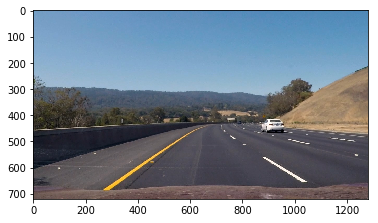

In [18]:
image = plt.imread("test_images/test3.jpg")
plt.imshow(image)

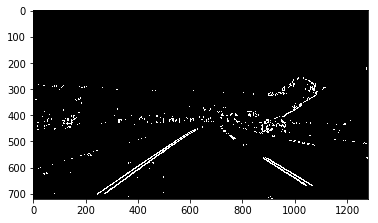

In [24]:
result, left_fitx, right_fitx, ploty, bird_view_threshold, combined_gradient = Pre_processing(image)
plt.imshow(combined_gradient, cmap='gray')

(720, 1280, 3)


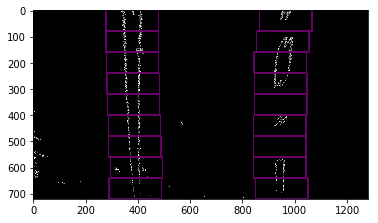

In [19]:
print(bird_view_threshold.shape)
plt.imshow(bird_view_threshold)

(720, 0)

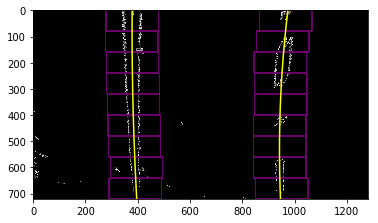

In [20]:
# Plot polynomial on pixels in sliding windows
plt.imshow(bird_view_threshold)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

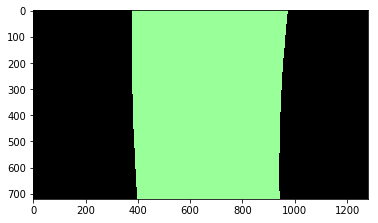

In [14]:
warp_zero = np.zeros_like(bird_view_threshold).astype(np.uint8)
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))
pts = np.int_([pts])

cv2.fillPoly(warp_zero, pts, (153,255,153))
plt.imshow(warp_zero)

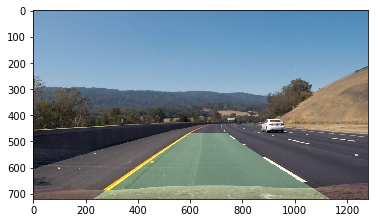

In [15]:
imshape = (image.shape[0], image.shape[1])
img_size = (image.shape[1], image.shape[0])
src = np.float32([(150,imshape[0]),(600, 470), (750, 470), (1150,imshape[0])])
dst = np.float32([(350,imshape[0]),(400, 0), (1000, 0), (950,imshape[0])])
M_inverse = cv2.getPerspectiveTransform(dst, src)
newwarp = cv2.warpPerspective(warp_zero, M_inverse, (imshape[1], imshape[0])) 
    
# Drawing
result = cv2.addWeighted(image, 1, newwarp, 0.3, 0)
plt.imshow(result)

In [221]:
#Sanity Check
#Ok, so your algorithm found some lines. Before moving on, you should check that the detection makes sense. To confirm that your detected lane lines are real, you might consider:

#Checking that they have similar curvature
#Checking that they are separated by approximately the right distance horizontally
#Checking that they are roughly parallel

# GO!

In [4]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import os

In [5]:
for file in os.listdir('test_images/'):
    test_img = mpimg.imread("test_images/{}".format(file))

In [6]:
clip1 = VideoFileClip("project_video.mp4")
#clip1 = VideoFileClip("project_video.mp4").subclip(0,5)
video_output = 'test_videos_output/project_video.mp4'

In [7]:
white_clip = clip1.fl_image(Pre_processing) 
%time white_clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/project_video.mp4
[MoviePy] Writing video test_videos_output/project_video.mp4


100%|█████████▉| 1260/1261 [06:58<00:00,  3.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/project_video.mp4 

CPU times: user 4min 34s, sys: 13.6 s, total: 4min 47s
Wall time: 7min 1s


In [8]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output))

In [9]:
clip2 = VideoFileClip("challenge_video.mp4")
#clip2 = VideoFileClip("challenge_video.mp4").subclip(0,5)
video_output_2 = 'test_videos_output/challenge_video.mp4'

In [10]:
white_clip = clip2.fl_image(Pre_processing) 
%time white_clip.write_videofile(video_output_2, audio=False)

[MoviePy] >>>> Building video test_videos_output/challenge_video.mp4
[MoviePy] Writing video test_videos_output/challenge_video.mp4


100%|██████████| 485/485 [02:40<00:00,  2.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/challenge_video.mp4 

CPU times: user 1min 47s, sys: 5.27 s, total: 1min 52s
Wall time: 2min 43s


In [11]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output_2))

In [12]:
clip3 = VideoFileClip("harder_challenge_video.mp4")
#clip3 = VideoFileClip("harder_challenge_video.mp4").subclip(0,5)
video_output_3 = 'test_videos_output/harder_challenge_video.mp4'

In [13]:
white_clip = clip3.fl_image(Pre_processing) 
%time white_clip.write_videofile(video_output_3, audio=False)

[MoviePy] >>>> Building video test_videos_output/harder_challenge_video.mp4
[MoviePy] Writing video test_videos_output/harder_challenge_video.mp4


100%|█████████▉| 1199/1200 [08:41<00:00,  2.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/harder_challenge_video.mp4 

CPU times: user 5min 44s, sys: 14.5 s, total: 5min 59s
Wall time: 8min 45s


In [14]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output_3))

# Appendix | Areas of improvement for consideration

In [ ]:
#1 Improve Efficiency - Poly approx for following video frames

    # Choose the width of the margin (hyperparameter) around the previous polynomial to search
    margin_poly = 100

    # Set the area of search based on activated x-values within the +/- margin of the polynomial function
    left_lane_inds_poly = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin_poly)) & 
                           (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin_poly)))
    right_lane_inds_poly = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin_poly)) & 
                            (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin_poly)))

    # Extract left and right line pixel positions
    leftx_poly_2 = nonzerox[left_lane_inds_poly]
    lefty_poly_2 = nonzeroy[left_lane_inds_poly] 
    rightx_poly_2 = nonzerox[right_lane_inds_poly]
    righty_poly_2 = nonzeroy[right_lane_inds_poly]

    # Fit new polynomials
    # Use existing pixels to derive variables a,b and c of quadratic function (2 degree polynomial)
    left_fit_poly = np.polyfit(lefty_poly_2, leftx_poly_2, 2)
    right_fit_poly = np.polyfit(righty_poly_2, rightx_poly_2, 2)

    # Plot variables into polynomial to generate additional y values for plotting based on newly generated y values
    left_fitx_poly = left_fit_poly[0]*ploty**2 + left_fit_poly[1]*ploty + left_fit_poly[2]
    right_fitx_poly = right_fit_poly[0]*ploty**2 + right_fit_poly[1]*ploty + right_fit_poly[2]



In [ ]:
#2 Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None

In [ ]:
#3 Measure and track curvature measures as sanity check

# Define conversions in x and y from pixels space to meters
# U.S. regulations require a minimum lane width of 12 feet or 3.7 meters
# & dashed lane lines are 10 feet or 3 meters long each.

ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Define y-value where we want radius of curvature
# We'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)
    
# Calculation of R_curve (radius of curvature)
left_curverad_pixel = ((1 + (2*left_fit[0]*y_eval*ym_per_pix + left_fit[1]*xm_per_pix)**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad_pixel = ((1 + (2*right_fit[0]*y_eval*ym_per_pix + right_fit[1]*xm_per_pix)**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad_pixel)
print(right_curverad_pixel)